In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

dataset=pd.read_csv('assets\Salary_Dataset_with_Extra_Features.csv') #Cargamos el dataset
dataset.head() #Mostramos las primeras 5 filas del dataset

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [4]:
dataset.info() #Mostramos las columnas del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22770 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


In [5]:
#Nota no se utiliza solo este metodo, mas abajo usamos la metodologia propuesta
dataset.describe()

,Rating,Salary,Salaries Reported
count,22770.000000,2.277000e+04,22770.000000
mean,3.918213,6.953872e+05,1.855775
std,0.519675,8.843990e+05,6.823668
min,1.000000,2.112000e+03,1.000000
25%,3.700000,3.000000e+05,1.000000
50%,3.900000,5.000000e+05,1.000000
75%,4.200000,9.000000e+05,1.000000
max,5.000000,9.000000e+07,361.000000


In [6]:
#Obtener columas del dataset que son de tipo numerico
columns=dataset.select_dtypes(include=['int64','float64']).columns
numeric_dataset=dataset[columns] #Obtenemos las columnas numericas del dataset y creamos un nuevo dataset
numeric_dataset.head()

,Rating,Salary,Salaries Reported
0,3.8,400000,3
1,4.5,400000,3
2,4.0,1000000,3
3,3.8,300000,3
4,4.4,600000,3


In [15]:
# Calcular la media, suma de todos los valores entre la cantidad de valores
media = numeric_dataset.sum() / numeric_dataset.count()

# Calcular la moda (el valor más común)
# Utilizamos apply para aplicar una función a cada columna, lambda para definir una función anónima 
# value_counts para contar los valores y ordenarlos de mayor a menor,
# despues obtenemos el primer valor (el más común)
moda = numeric_dataset.apply(lambda x: x.value_counts().index[0]) 

# Calcular el valor mínimo
min = numeric_dataset.min()

# Calcular el valor máximo
max = numeric_dataset.max()



# Calcular la desviación estándar
# Utilizamos apply para aplicar una función a cada columna, lambda para definir una función anónima
# x representa cada columna, (x - media)**2 es la diferencia entre cada valor y la media al cuadrado
# sum() es la suma de todos los valores, numeric_dataset.count() es la cantidad de valores
# al final dividimos la suma entre la cantidad de valores menos 1 
varianza_muestral = ((numeric_dataset - media) ** 2).sum() / (numeric_dataset.count() - 1)

# Calcula la desviación estándar (raíz cuadrada de la varianza muestral)
desviacion_estandar = varianza_muestral.apply(lambda x: x ** 0.5)

# Calcular la cantidad de datos faltantes por atributo
datos_faltantes = numeric_dataset.isnull().sum()

# Crear un DataFrame con las estadísticas
estadisticas = pd.DataFrame({
    'Media': media,
    'Moda': moda,
    'Mínimo': min,
    'Máximo': max,
    'Desviación Estándar': desviacion_estandar,
    'Datos Faltantes': datos_faltantes
})

# Imprimir las estadísticas
estadisticas

,Media,Moda,Mínimo,Máximo,Desviación Estándar,Datos Faltantes
Rating,3.918213,4.0,1.0,5.0,0.519675,0
Salary,695387.211243,300000.0,2112.0,90000000.0,884399.013676,0
Salaries Reported,1.855775,1.0,1.0,361.0,6.823668,0


Rating


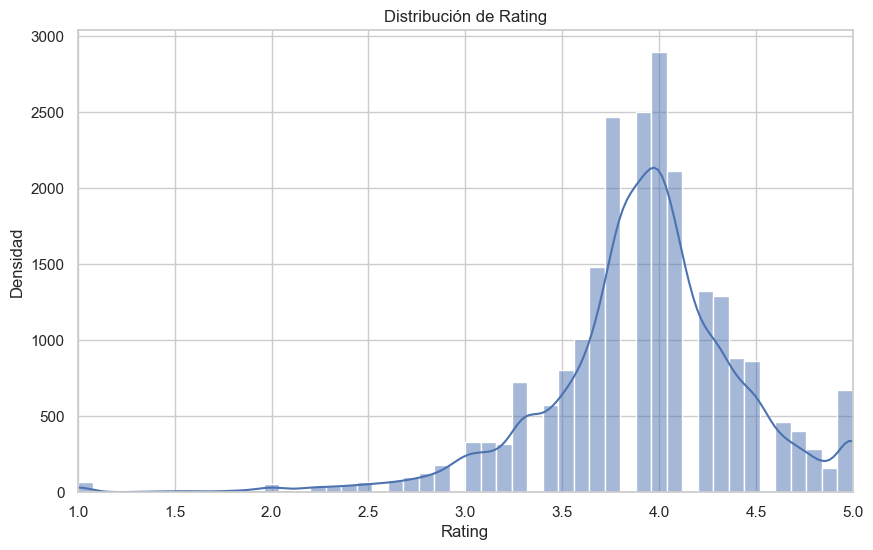

Salary


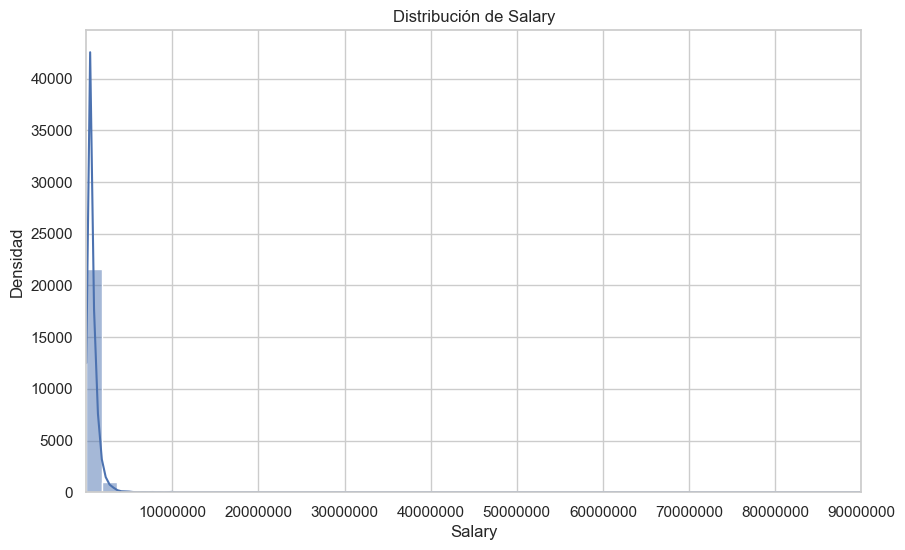

Salaries Reported


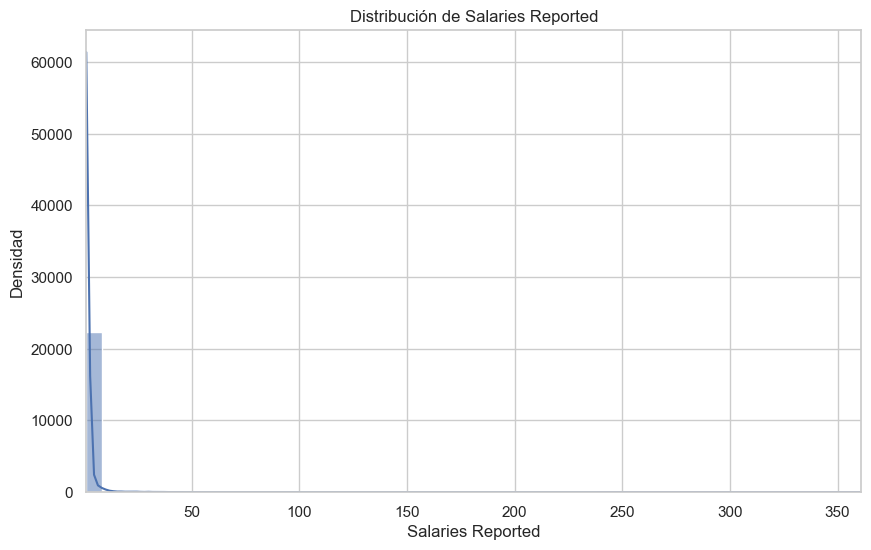

In [7]:
# Visualizar las distribuciones de los datos
bins=50 #Cantidad de barras en el histograma
sns.set(style="whitegrid")

# Visualizar las distribuciones de los datos de manera más presentable
for columna in numeric_dataset.columns:
    print(columna)
  
    plt.figure(figsize=(10, 6))

    # Histograma
    sns.histplot(data=numeric_dataset[columna], bins=bins, kde=True) 
    plt.title(f'Distribución de {columna}')
    plt.ylabel('Densidad')
    plt.xlabel(columna)
    plt.xlim(numeric_dataset[columna].min(),numeric_dataset[columna].max() )
    if (columna=='Salary') :
        # Evitar notación científica en el eje x
        plt.ticklabel_format(style='plain', axis='x')
    plt.show()


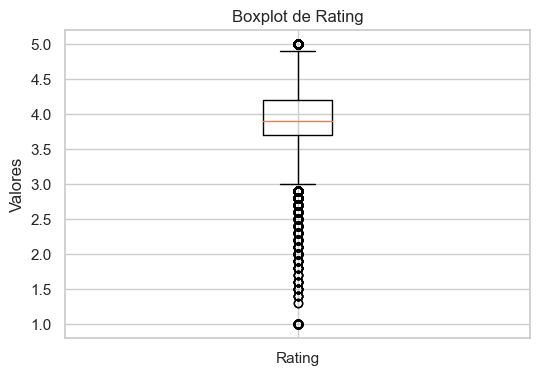

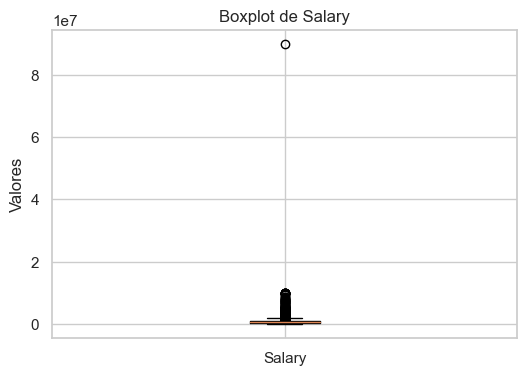

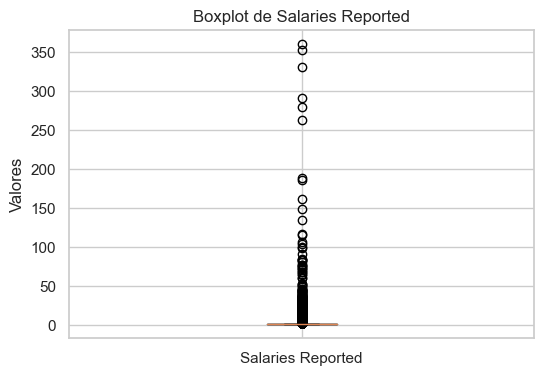

In [20]:
#Iteracion de las columnas del dataset para crear los boxplots
for column in numeric_dataset.columns:
    plt.figure(figsize=(6, 4))  # Tamaño de la figura
    plt.boxplot(numeric_dataset[column])  # Crea el boxplot 
    plt.title(f"Boxplot de {column}")  # Título del gráfico
    plt.ylabel("Valores")  # Etiqueta del eje y
    plt.xticks([1], [column])  # Etiqueta del eje x con el nombre de la columna
    plt.show()  # Muestra el boxplot de la columna actual